Figure 1A
====

In [1]:
import sys
import copy
import random
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import scipy as scipy
import math
from time import gmtime, strftime
import cProfile
import timeit
import scipy.sparse as sps
import warnings
from scipy.sparse import SparseEfficiencyWarning
warnings.simplefilter('ignore', SparseEfficiencyWarning)
import numpy as np
import gzip
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from time import gmtime, strftime
import gzip
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import matplotlib
import matplotlib.patches as patches
import math
from scipy.stats.mstats import mquantiles
from random import randint
from sklearn.metrics.cluster import adjusted_rand_score
from scipy import stats
from matplotlib import cm
import pandas as pd
import math
import scipy
import collections
import sys
import gzip
import numpy as np
import os
import re
import gzip
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from time import gmtime, strftime
import matplotlib.pyplot as plt
import scipy.sparse as sps
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from matplotlib import rc
from matplotlib import rcParams
from numpy import linalg as LA
%matplotlib inline

In [2]:
sys.path.append('/srv/gsfs0/projects/kundaje/users/oursu/code/3DChromatin_ReplicateQC/software/genomedisco/')
from genomedisco import processing, data_operations

In [3]:
def plot_hic_matrices(ms,resolution,nticks,figwidth,figheight,x,add_to_start,desired_title,vmin,vmax,cmap,where_colorbar):

    #set ticks
    nnodes=ms[0].shape[0]
    stepsize=int(1.0*nnodes/nticks)
    start=0
    ticklist=[]
    ticknames=[]
    while start<=nnodes:
        ticklist.append(start)
        ticknames.append(str(1.0*(add_to_start*resolution+start*resolution))+' Mb')
        start+=stepsize

    colorbar_ticks=[vmin,0,vmax]
    if vmin==0:
        colorbar_ticks=[0,vmax]
    fig, plots = plt.subplots(1,len(ms))
    fig.set_size_inches(figwidth,figheight)
    fig.suptitle(desired_title, fontsize=20)
    for f in range(len(ms)):
        im1 = plots[f].matshow(ms[f],vmin=vmin,vmax=vmax,cmap=cmap)
        # Create divider for existing axes instance
        divider = make_axes_locatable(plots[f])
        if where_colorbar=='horizontal':
            cax = divider.append_axes("bottom", size="10%", pad=0.5)
            cbar = plt.colorbar(im1, cax=cax, ticks=MultipleLocator(0.2), format="%.3f",orientation='horizontal')
        if where_colorbar=='vertical':
            cax = divider.append_axes("right", size="10%", pad=0.5)
            cbar = plt.colorbar(im1, cax=cax, ticks=MultipleLocator(0.2), format="%.3f",orientation='vertical')
        cbar.set_ticks(colorbar_ticks)
        cbar.set_ticklabels(colorbar_ticks)
        cbar.ax.tick_params(labelsize=15)
        plots[f].set_yticks([])
        plots[f].set_xticks(ticklist)
        plots[f].set_yticklabels([],size=15)
        plots[f].set_xticklabels(ticknames,size=15)
    plt.subplots_adjust(top=0.8)

GenomeDISCO | Sat Feb  3 16:29:43 2018 | processing: Loading genomic regions from /ifs/scratch/oursu/paper_2017-12-20/simulations/nodes/nodes.50000.chr21.gz
GenomeDISCO | Sat Feb  3 16:29:43 2018 | processing: Loading interaction data from /ifs/scratch/oursu/paper_2017-12-20/results/rao/res50000.final/data/edges/HIC025/HIC025.chr21.gz
GenomeDISCO | Sat Feb  3 16:29:44 2018 | processing: Loading interaction data from /ifs/scratch/oursu/paper_2017-12-20/results/rao/res50000.final/data/edges/HIC026/HIC026.chr21.gz
GenomeDISCO | Sat Feb  3 16:29:45 2018 | processing: Loading interaction data from /ifs/scratch/oursu/paper_2017-12-20/results/rao/res50000.final/data/edges/HIC051/HIC051.chr21.gz


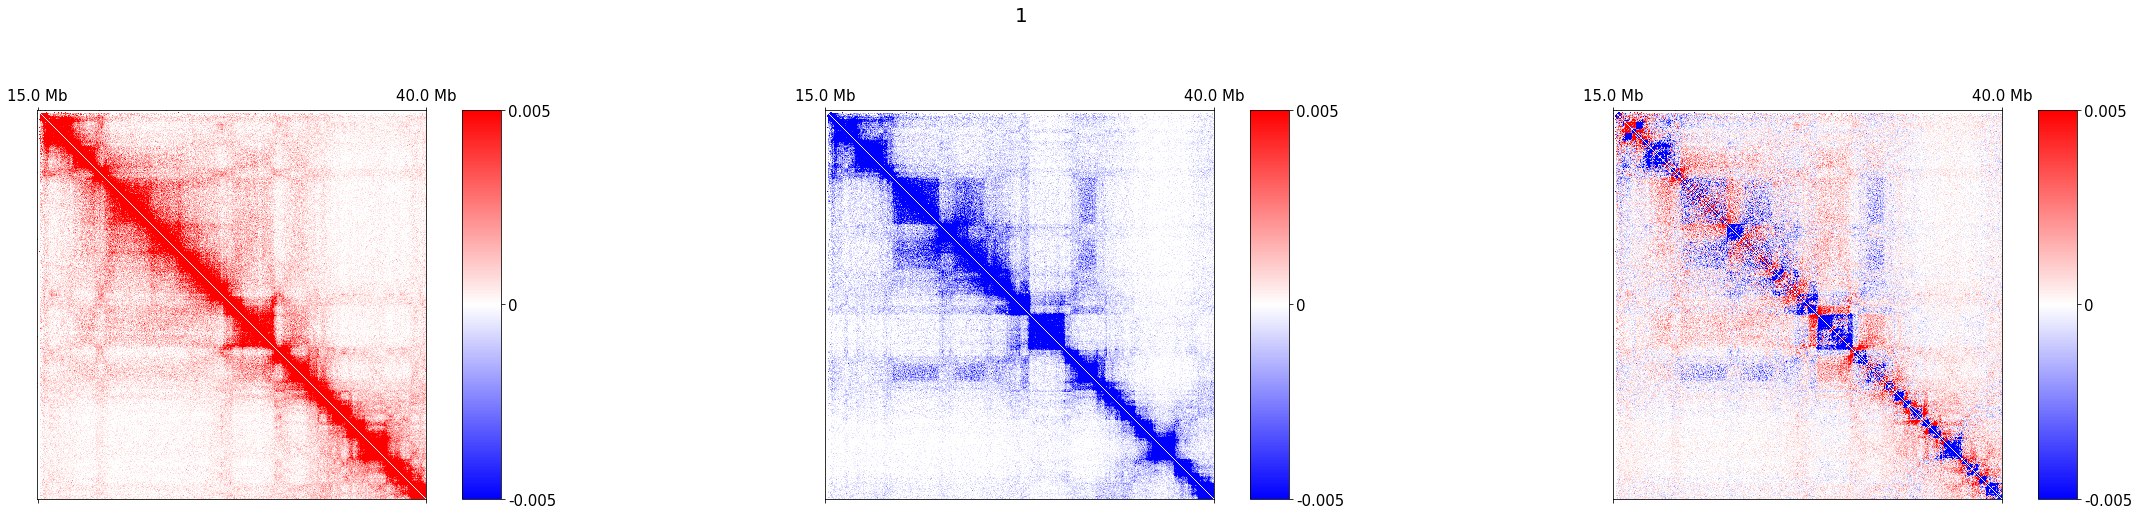

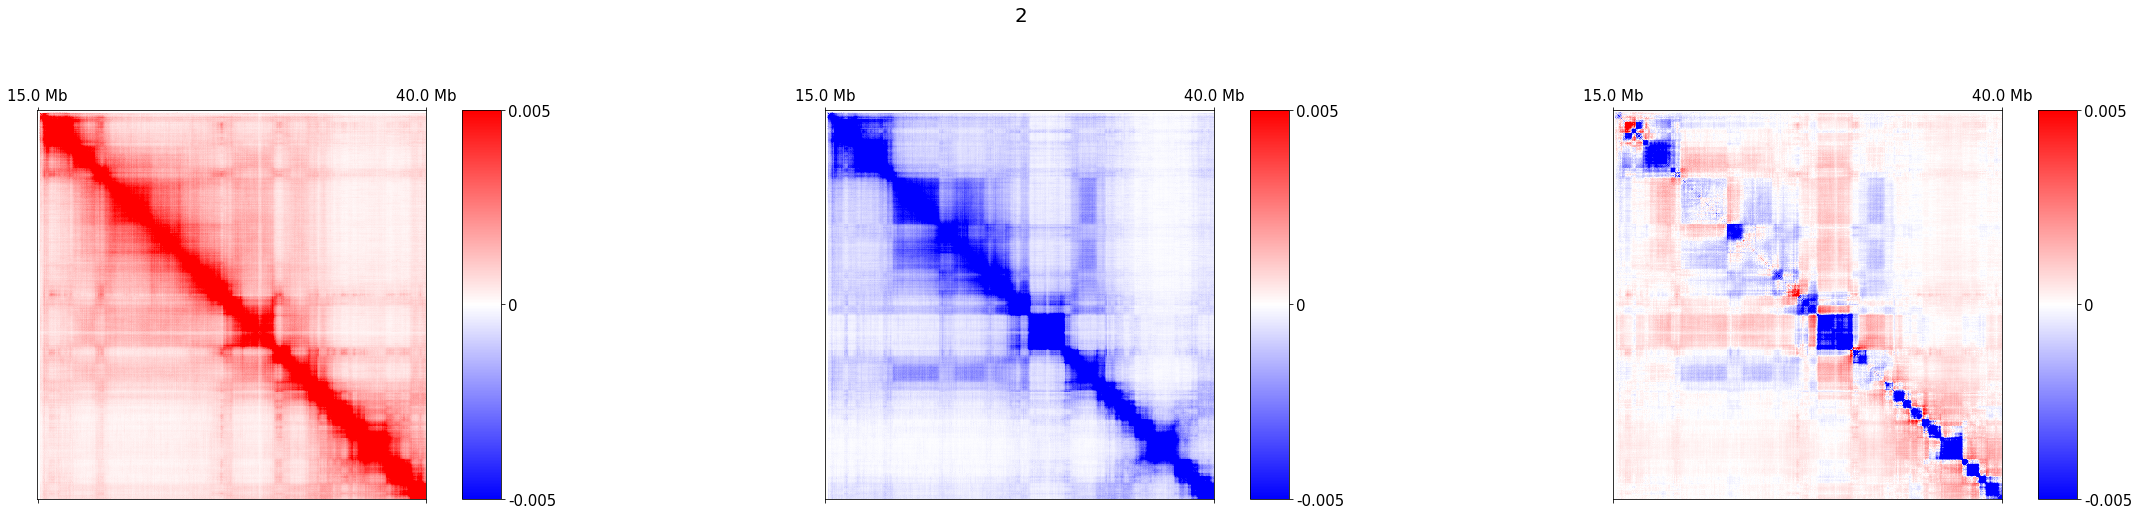

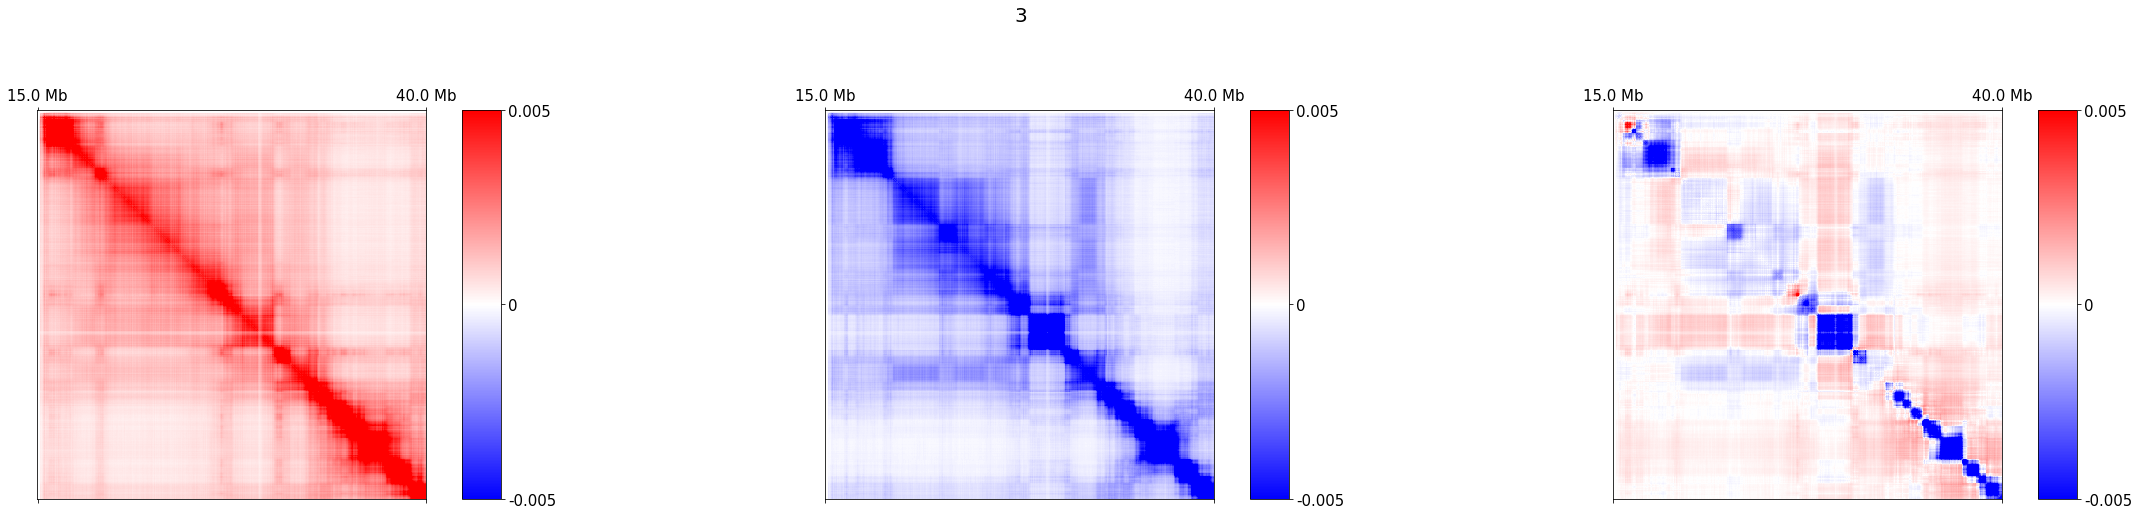

In [41]:
node_file='/ifs/scratch/oursu/paper_2017-12-20/simulations/nodes/nodes.50000.chr21.gz'
m1file='/ifs/scratch/oursu/paper_2017-12-20/results/rao/res50000.final/data/edges/HIC025/HIC025.chr21.gz'
m2file='/ifs/scratch/oursu/paper_2017-12-20/results/rao/res50000.final/data/edges/HIC026/HIC026.chr21.gz'
m3file='/ifs/scratch/oursu/paper_2017-12-20/results/rao/res50000.final/data/edges/HIC051/HIC051.chr21.gz'
nodes,nodes_idx,blacklist_nodes=processing.read_nodes_from_bed(node_file,'NA')
m1=data_operations.sqrtvc(processing.construct_csr_matrix_from_data_and_nodes(m1file,nodes,blacklist_nodes,True)).toarray()
m2=data_operations.sqrtvc(processing.construct_csr_matrix_from_data_and_nodes(m2file,nodes,blacklist_nodes,True)).toarray()
m3=data_operations.sqrtvc(processing.construct_csr_matrix_from_data_and_nodes(m3file,nodes,blacklist_nodes,True)).toarray()
m2=m2+m2.T
m3=m3+m3.T
m1=m1+m1.T

ms=[]
ms.append(m1[s:e,s:e])
ms.append(m2[s:e,s:e])
ms.append(m3[s:e,s:e])

s=300
e=800

def rwalk(mat,t):
    return np.linalg.matrix_power(mat,t)

rws={}
for rw in [1,2,3]:
    rws[rw]=[]
    rws[rw].append(rwalk(m1,rw)[s:e,s:e])
    rws[rw].append(-rwalk(m3,rw)[s:e,s:e])
    rws[rw].append(rwalk(m1,rw)[s:e,s:e]-rwalk(m3,rw)[s:e,s:e])

#params
resolution=0.05
nticks=1
figwidth=40
figheight=8
add_to_start=400
arrangement='vertical'

x=0.005
for rw in [1,2,3]:
    plot_hic_matrices(rws[rw],resolution,nticks,figwidth,figheight,x,s,str(rw),-x,x,'bwr',arrangement)